In [1]:
#Step (1): Read Data
import pandas as pd #Read data
import numpy as np  #Array
import matplotlib.pyplot as plt
import seaborn as sns;
# Read in dataset 
data = pd.read_excel("01train.xlsx")
data.drop(['手機螢幕溫度(平均)','CPU跑分階級','通話頻率指標'], axis=1, inplace=True)
data.head() # Show data 


,手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,手機外殼/包膜指標,外型平均曲率,上網頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
0,63.833333,43.213333,231.000000,0.039474,61.255411,0.053652,-0.037180,6235.000000,0,0.999244,1,0
1,57.857143,58.053333,92.090000,0.732759,91.393846,0.074205,0.155243,1750.000000,0,0.950294,2,1
2,36.714286,36.661527,836.239303,0.229050,68.931202,0.121504,0.031717,2679.476981,0,1.000000,1,0
3,41.571429,63.213333,588.800000,0.090909,54.455267,0.153716,0.009326,362.900000,0,0.918970,1,1
4,49.404762,52.486667,683.900000,0.072727,61.922799,0.097287,-0.030090,2777.000000,0,0.906411,1,0


In [2]:


# Read in dataset 
data2 = pd.read_excel("01test.xlsx")
data2.drop(['id','手機螢幕溫度(平均)','CPU跑分階級','通話頻率指標'], axis=1, inplace=True)
data3 = pd.read_excel("01test.xlsx")
data2.head() # Show data 



,手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,手機外殼/包膜指標,外型平均曲率,上網頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級
0,75.523810,59.086667,604.400000,0.102564,54.834055,0.083116,-0.12770,2706.000000,0,1.000000,1
1,60.000000,64.773333,529.200000,0.010526,62.301587,0.165030,-0.04399,3947.000000,1,0.851483,1
2,64.166667,41.860000,718.200000,0.344444,87.997124,0.037002,-0.12650,5977.000000,1,0.999404,1
3,71.285714,49.840000,295.400000,0.871795,53.517316,0.105573,-0.08424,3768.000000,0,0.988045,1
4,24.761905,55.232361,178.264444,0.006289,68.754715,0.092935,0.02135,98.991312,0,0.982846,2


In [3]:
def  outlier_del(data_frame,name_list_outlier):
    for i, name in enumerate(name_list_outlier):
        print(name)
        print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
        # 计算IQR
        Q1 = np.percentile(data_frame[name], 25)
        Q3 = np.percentile(data_frame[name], 75)
        IQR = Q3 - Q1
        n = 1.5

        # 定义离群值范围
        lower_bound = Q1 - n * IQR
        upper_bound = Q3 + n * IQR

        # 过滤离群值
        filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
        data_frame = data_frame[filtered_entries]
    
        print("Shape Of The After Ouliers: ",data_frame[name].shape)
        print('===================================================================================================================')
    return data_frame


In [4]:
name_list_outlier =['手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標','手機電池電量','手機外殼/包膜指標','外型平均曲率','上網頻率指標','內容容量比率']

data=outlier_del(data,name_list_outlier)





手機螢幕溫度(最大)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機背蓋溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3783,)
平均APP運作指標/小時
Shape Of The Before Ouliers:  (3783,)
Shape Of The After Ouliers:  (3528,)
充電時間指標
Shape Of The Before Ouliers:  (3528,)
Shape Of The After Ouliers:  (3504,)
手機電池電量
Shape Of The Before Ouliers:  (3504,)
Shape Of The After Ouliers:  (3504,)
手機外殼/包膜指標
Shape Of The Before Ouliers:  (3504,)
Shape Of The After Ouliers:  (3422,)
外型平均曲率
Shape Of The Before Ouliers:  (3422,)
Shape Of The After Ouliers:  (3312,)
上網頻率指標
Shape Of The Before Ouliers:  (3312,)
Shape Of The After Ouliers:  (3295,)
內容容量比率
Shape Of The Before Ouliers:  (3295,)
Shape Of The After Ouliers:  (3088,)


In [5]:
from sklearn.preprocessing import StandardScaler

# 定義需要標準化的欄位
columns_to_standardize = [ '手機螢幕溫度(最大)', '手機背蓋溫度(平均)', '平均APP運作指標/小時', '手機電池電量', '上網頻率指標']

# 初始化標準化物件
standard_scaler  = StandardScaler()

# 將資料標準化
data[columns_to_standardize] = standard_scaler .fit_transform(data[columns_to_standardize])

# 顯示標準化後的資料
print(data.head())

   手機螢幕溫度(最大)  手機背蓋溫度(平均)  平均APP運作指標/小時    充電時間指標    手機電池電量  手機外殼/包膜指標  \
0    1.187605   -0.782644     -0.799299  0.039474 -0.974252   0.053652   
1    0.772316    0.462901     -1.148806  0.732759  1.154200   0.074205   
2   -0.696913   -1.332548      0.723523  0.229050 -0.432168   0.121504   
3   -0.359387    0.895988      0.100949  0.090909 -1.454495   0.153716   
4    0.184956   -0.004319      0.340227  0.072727 -0.927119   0.097287   

     外型平均曲率    上網頻率指標  新機/二手/老舊    內容容量比率  CPU效能等級  Underclocking  
0 -0.037180  2.280827         0  0.999244        1              0  
1  0.155243 -0.451899         0  0.950294        2              1  
2  0.031717  0.114434         0  1.000000        1              0  
3  0.009326 -1.297064         0  0.918970        1              1  
4 -0.030090  0.173855         0  0.906411        1              0  


In [6]:
from sklearn.preprocessing import MinMaxScaler


columns_to_normalize = [ '內容容量比率', '外型平均曲率', '手機外殼/包膜指標', '充電時間指標']

# 初始化標準化物件
min_max_scaler = MinMaxScaler()

# 將資料標準化
data[columns_to_normalize] = min_max_scaler.fit_transform(data[columns_to_normalize])

# 顯示標準化後的資料
print(data.head())

   手機螢幕溫度(最大)  手機背蓋溫度(平均)  平均APP運作指標/小時    充電時間指標    手機電池電量  手機外殼/包膜指標  \
0    1.187605   -0.782644     -0.799299  0.044698 -0.974252   0.187806   
1    0.772316    0.462901     -1.148806  0.829741  1.154200   0.265061   
2   -0.696913   -1.332548      0.723523  0.259366 -0.432168   0.442857   
3   -0.359387    0.895988      0.100949  0.102941 -1.454495   0.563939   
4    0.184956   -0.004319      0.340227  0.082353 -0.927119   0.351824   

     外型平均曲率    上網頻率指標  新機/二手/老舊    內容容量比率  CPU效能等級  Underclocking  
0  0.411726  2.280827         0  0.998346        1              0  
1  0.766805 -0.451899         0  0.891216        2              1  
2  0.538862  0.114434         0  1.000000        1              0  
3  0.497543 -1.297064         0  0.822663        1              1  
4  0.424809  0.173855         0  0.795177        1              0  


In [7]:
from sklearn.preprocessing import StandardScaler

# 定義需要標準化的欄位
columns_to_standardize = [ '手機螢幕溫度(最大)', '手機背蓋溫度(平均)', '平均APP運作指標/小時', '手機電池電量', '上網頻率指標']

# 初始化標準化物件
standard_scaler  = StandardScaler()

# 將資料標準化
data2[columns_to_standardize] = standard_scaler .fit_transform(data2[columns_to_standardize])

# 顯示標準化後的資料
print(data2.head())

   手機螢幕溫度(最大)  手機背蓋溫度(平均)  平均APP運作指標/小時    充電時間指標    手機電池電量  手機外殼/包膜指標  \
0    1.885449    0.505094     -0.087306  0.102564 -1.444970   0.083116   
1    0.905279    0.898100     -0.199008  0.010526 -0.913950   0.165030   
2    1.168362   -0.685442      0.081733  0.344444  0.913272   0.037002   
3    1.617857   -0.133944     -0.546295  0.871795 -1.538604   0.105573   
4   -1.319646    0.238723     -0.720288  0.006289 -0.455065   0.092935   

    外型平均曲率    上網頻率指標  新機/二手/老舊    內容容量比率  CPU效能等級  
0 -0.12770  0.076829         0  1.000000        1  
1 -0.04399  0.752419         1  0.851483        1  
2 -0.12650  1.857534         1  0.999404        1  
3 -0.08424  0.654973         0  0.988045        1  
4  0.02135 -1.342404         0  0.982846        2  


In [8]:
columns_to_normalize = [ '內容容量比率', '外型平均曲率', '手機外殼/包膜指標', '充電時間指標']

# 初始化標準化物件
min_max_scaler = MinMaxScaler()

# 將資料標準化
data2[columns_to_normalize] = min_max_scaler.fit_transform(data2[columns_to_normalize])

# 顯示標準化後的資料
print(data2.head())

   手機螢幕溫度(最大)  手機背蓋溫度(平均)  平均APP運作指標/小時    充電時間指標    手機電池電量  手機外殼/包膜指標  \
0    1.885449    0.505094     -0.087306  0.106101 -1.444970   0.055026   
1    0.905279    0.898100     -0.199008  0.010889 -0.913950   0.110455   
2    1.168362   -0.685442      0.081733  0.356322  0.913272   0.023821   
3    1.617857   -0.133944     -0.546295  0.901857 -1.538604   0.070222   
4   -1.319646    0.238723     -0.720288  0.006506 -0.455065   0.061670   

     外型平均曲率    上網頻率指標  新機/二手/老舊    內容容量比率  CPU效能等級  
0  0.406577  0.076829         0  1.000000        1  
1  0.443761  0.752419         1  0.851483        1  
2  0.407110  1.857534         1  0.999404        1  
3  0.425882  0.654973         0  0.988045        1  
4  0.472785 -1.342404         0  0.982846        2  


In [9]:
#Check data imbalance
class_distribution = data['Underclocking'].value_counts() #指定data中的label欄位，進行各類別數量的統計
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Underclocking
0    1776
1    1312
Name: count, dtype: int64


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

X_data = data.values[:, :-1]  # 获取所有数据，除了最后一列（假设最后一列是标签列）
Y_data = data['Underclocking'].values

# 切分訓練集和測試集
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# 定义SVM模型
svm_model = SVC()

# 定义参数范围
param_grid = {'C': [round(i, 2) for i in np.arange(0, 100, 1)],
              'gamma': [round(i, 2) for i in np.arange(0.0001, 2, 0.0001)],
              'kernel': ['rbf']}

# 使用GridSearchCV进行5-fold Grid Cross Validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, return_train_score=True, n_jobs=4)
grid_search.fit(X_train, Y_train)

# 获取最佳参数
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 绘制 C 值对 accuracy 的图
C_values = [params['C'] for params in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_train_scores = grid_search.cv_results_['mean_train_score']

plt.figure(figsize=(12, 6))

# Plot C 值对 validation score 的图
plt.subplot(1, 2, 1)
plt.plot(C_values, mean_test_scores, marker='o', label='Validation Score')
plt.plot(C_values, mean_train_scores, marker='o', label='Training Score')
plt.xlabel('C Values')
plt.ylabel('Mean Score')
plt.title('C Values vs Mean Score')
plt.legend()
plt.grid(True)

# 绘制 gamma 值对 validation score 的图
gamma_values = [params['gamma'] for params in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_train_scores = grid_search.cv_results_['mean_train_score']

plt.subplot(1, 2, 2)
plt.plot(gamma_values, mean_test_scores, marker='o', label='Validation Score')
plt.plot(gamma_values, mean_train_scores, marker='o', label='Training Score')
plt.xlabel('Gamma Values')
plt.ylabel('Mean Score')
plt.title('Gamma Values vs Mean Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Fitting 5 folds for each of 1999900 candidates, totalling 9999500 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 分離特徵和標籤
X_data = data.values[:, :-1]  # 获取所有数据，除了最后一列（假设最后一列是标签列）
Y_data = data['Underclocking'].values

# 切分訓練集和測試集


X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=1)

# 定义SVM模型
svm_model = SVC(C=1.36, gamma=0.128, kernel='rbf')

# 使用模型对训练集进行训练
svm_model.fit(X_train, Y_train)

# 获取训练集和验证集的预测结果
Y_train_pred = svm_model.predict(X_train)
Y_test_pred = svm_model.predict(X_test)

# 计算训练集和验证集的准确率
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)


Training Accuracy: 0.6983805668016194
Validation Accuracy: 0.6909385113268608


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, KFold
import numpy as np

# 定义SVM模型
svm_model = SVC(C=1.36, gamma=0.128, kernel='rbf')

# 分離特徵和標籤
X_data = data.values[:, :-1]  # 获取所有数据，除了最后一列（假设最后一列是标签列）
Y_data = data['Underclocking'].values

# 5th-fold交叉验证
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
cv_results = cross_validate(svm_model, X_data, Y_data, cv=kfold, scoring='accuracy', return_train_score=True)

# 输出每个fold的训练得分和验证得分
for i in range(5):
    train_score = cv_results['train_score'][i]
    test_score = cv_results['test_score'][i]
    print(f"Fold {i+1} - Training Score: {train_score}, Validation Score: {test_score}")

# 输出平均训练得分和验证得分
mean_train_score = np.mean(cv_results['train_score'])
mean_test_score = np.mean(cv_results['test_score'])
print(f"\nMean Training Score: {mean_train_score}")
print(f"Mean Validation Score: {mean_test_score}")

Fold 1 - Training Score: 0.6983805668016194, Validation Score: 0.6909385113268608
Fold 2 - Training Score: 0.7048582995951417, Validation Score: 0.6618122977346278
Fold 3 - Training Score: 0.6931174089068826, Validation Score: 0.7006472491909385
Fold 4 - Training Score: 0.6944556859571024, Validation Score: 0.6758508914100486
Fold 5 - Training Score: 0.6993120194253338, Validation Score: 0.6450567260940032

Mean Training Score: 0.6980247961372159
Mean Validation Score: 0.6748611351512958


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 分離特徵和標籤
X_data = data.values[:, :-1]  # 获取所有数据，除了最后一列（假设最后一列是标签列）
Y_data = data['Underclocking'].values

# 切分訓練集和測試集


X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# 定义SVM模型
svm_model = SVC(C=95.2, gamma=0.08, kernel='rbf')

# 使用模型对训练集进行训练
svm_model.fit(X_train, Y_train)

# 获取训练集和验证集的预测结果
Y_train_pred = svm_model.predict(X_train)
Y_test_pred = svm_model.predict(X_test)

# 计算训练集和验证集的准确率
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)

Training Accuracy: 0.7765182186234818
Validation Accuracy: 0.6601941747572816


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, KFold
import numpy as np

# 定义SVM模型
svm_model = SVC(C=100, gamma=0.1, kernel='rbf')

# 分離特徵和標籤
X_data = data.values[:, :-1]  # 获取所有数据，除了最后一列（假设最后一列是标签列）
Y_data = data['Underclocking'].values

# 5th-fold交叉验证
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
cv_results = cross_validate(svm_model, X_data, Y_data, cv=kfold, scoring='accuracy', return_train_score=True)

# 输出每个fold的训练得分和验证得分
for i in range(5):
    train_score = cv_results['train_score'][i]
    test_score = cv_results['test_score'][i]
    print(f"Fold {i+1} - Training Score: {train_score}, Validation Score: {test_score}")

# 输出平均训练得分和验证得分
mean_train_score = np.mean(cv_results['train_score'])
mean_test_score = np.mean(cv_results['test_score'])
print(f"\nMean Training Score: {mean_train_score}")
print(f"Mean Validation Score: {mean_test_score}")


Fold 1 - Training Score: 0.794331983805668, Validation Score: 0.6699029126213593
Fold 2 - Training Score: 0.7939271255060729, Validation Score: 0.6650485436893204
Fold 3 - Training Score: 0.794331983805668, Validation Score: 0.6763754045307443
Fold 4 - Training Score: 0.783893160663699, Validation Score: 0.7277147487844409
Fold 5 - Training Score: 0.7948199109672197, Validation Score: 0.6580226904376013

Mean Training Score: 0.7922608329496655
Mean Validation Score: 0.6794128600126932


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, KFold
import numpy as np

# 定义SVM模型
svm_model = SVC(C=1.49, gamma=0.15, kernel='rbf')

# 分離特徵和標籤
X_data = data.values[:, :-1]  # 获取所有数据，除了最后一列（假设最后一列是标签列）
Y_data = data['Underclocking'].values

# 5th-fold交叉验证
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
cv_results = cross_validate(svm_model, X_data, Y_data, cv=kfold, scoring='accuracy', return_train_score=True)

# 输出每个fold的训练得分和验证得分
for i in range(5):
    train_score = cv_results['train_score'][i]
    test_score = cv_results['test_score'][i]
    print(f"Fold {i+1} - Training Score: {train_score}, Validation Score: {test_score}")

# 输出平均训练得分和验证得分
mean_train_score = np.mean(cv_results['train_score'])
mean_test_score = np.mean(cv_results['test_score'])
print(f"\nMean Training Score: {mean_train_score}")
print(f"Mean Validation Score: {mean_test_score}")

Fold 1 - Training Score: 0.708502024291498, Validation Score: 0.6877022653721683
Fold 2 - Training Score: 0.7145748987854251, Validation Score: 0.6634304207119741
Fold 3 - Training Score: 0.7052631578947368, Validation Score: 0.7103559870550162
Fold 4 - Training Score: 0.7005261027923917, Validation Score: 0.6807131280388979
Fold 5 - Training Score: 0.7082152974504249, Validation Score: 0.6515397082658023

Mean Training Score: 0.7074162962428953
Mean Validation Score: 0.6787483018887718


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# 假设data是你的数据框架，已经准备好用于模型训练
# 分離特徵和標籤
X_data = data.values[:, :-1]  # 获取所有数据，除了最后一列（假设最后一列是标签列）
Y_data = data['Underclocking'].values

# 切分訓練集和測試集
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# 定义SVM模型
svm_model = SVC()

# 定义要搜索的参数网格
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

# 创建一个GridSearchCV对象
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# 在训练集上执行网格搜索
grid_search.fit(X_train, Y_train)

# 打印最佳参数和最佳分数
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 获取最佳模型
best_model = grid_search.best_estimator_

# 使用最佳模型对测试集进行预测
Y_test_pred = best_model.predict(X_test)

# 计算测试集的准确率
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.6971659919028339
Test Accuracy: 0.6553398058252428


Fitting 5 folds for each of 1111 candidates, totalling 5555 fits
Best Parameters: {'C': 1.49, 'gamma': 0.15, 'kernel': 'rbf'}


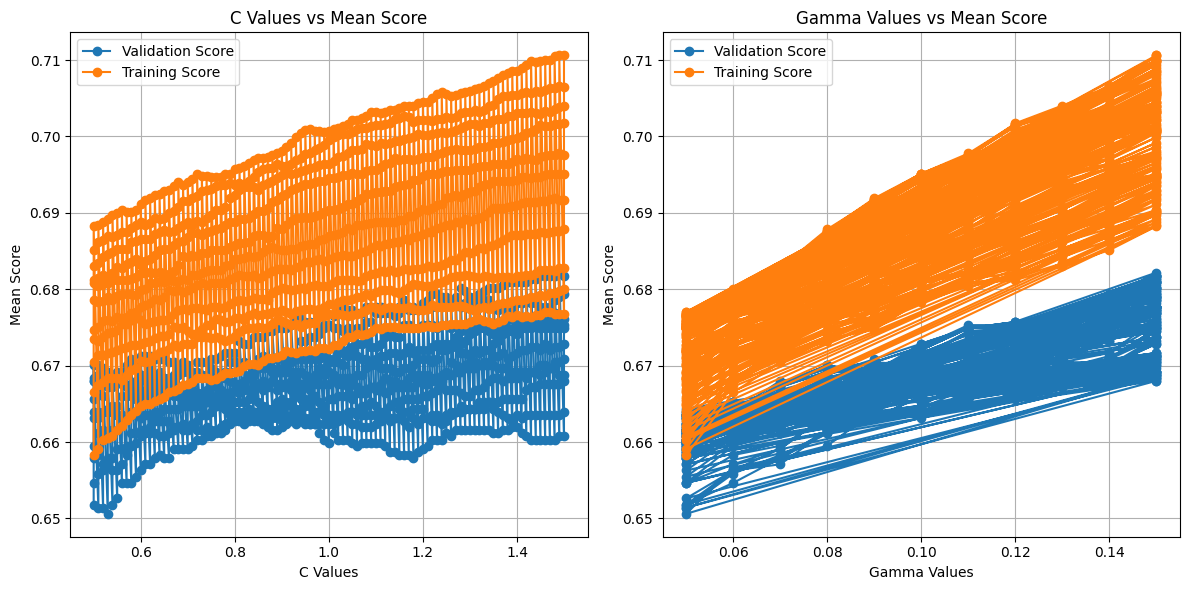

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

X_data = data.values[:, :-1]  # 获取所有数据，除了最后一列（假设最后一列是标签列）
Y_data = data['Underclocking'].values

# 切分訓練集和測試集
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# 定义SVM模型
svm_model = SVC()

# 定义参数范围
param_grid = {'C': [round(i, 2) for i in np.arange(0.5, 1.51, 0.01)],
              'gamma': [round(i, 2) for i in np.arange(0.05, 0.16, 0.01)],
              'kernel': ['rbf']}

# 使用GridSearchCV进行5-fold Grid Cross Validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# 获取最佳参数
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 绘制 C 值对 accuracy 的图
C_values = [params['C'] for params in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_train_scores = grid_search.cv_results_['mean_train_score']

plt.figure(figsize=(12, 6))

# Plot C 值对 validation score 的图
plt.subplot(1, 2, 1)
plt.plot(C_values, mean_test_scores, marker='o', label='Validation Score')
plt.plot(C_values, mean_train_scores, marker='o', label='Training Score')
plt.xlabel('C Values')
plt.ylabel('Mean Score')
plt.title('C Values vs Mean Score')
plt.legend()
plt.grid(True)

# 绘制 gamma 值对 validation score 的图
gamma_values = [params['gamma'] for params in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_train_scores = grid_search.cv_results_['mean_train_score']

plt.subplot(1, 2, 2)
plt.plot(gamma_values, mean_test_scores, marker='o', label='Validation Score')
plt.plot(gamma_values, mean_train_scores, marker='o', label='Training Score')
plt.xlabel('Gamma Values')
plt.ylabel('Mean Score')
plt.title('Gamma Values vs Mean Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# 定义SVM模型
svm_model = SVC()

# 定义参数范围
param_grid = {'C': [round(i, 2) for i in np.arange(95, 106, 0.1)],
              'gamma': [round(i, 2) for i in np.arange(0.05, 0.16, 0.01)],
              'kernel': ['rbf']}

# 使用GridSearchCV进行5-fold Grid Cross Validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, return_train_score=True)
grid_search.fit(X_train, Y_train)

# 获取最佳参数
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 绘制 C 值对 accuracy 的图
C_values = [params['C'] for params in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_train_scores = grid_search.cv_results_['mean_train_score']

plt.figure(figsize=(12, 6))

# Plot C 值对 validation score 的图
plt.subplot(1, 2, 1)
plt.plot(C_values, mean_test_scores, marker='o', label='Validation Score')
plt.plot(C_values, mean_train_scores, marker='o', label='Training Score')
plt.xlabel('C Values')
plt.ylabel('Mean Score')
plt.title('C Values vs Mean Score')
plt.xticks(C_values)
plt.legend()
plt.grid(True)

# 绘制 gamma 值对 validation score 的图
gamma_values = [params['gamma'] for params in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_train_scores = grid_search.cv_results_['mean_train_score']

plt.subplot(1, 2, 2)
plt.plot(gamma_values, mean_test_scores, marker='o', label='Validation Score')
plt.plot(gamma_values, mean_train_scores, marker='o', label='Training Score')
plt.xlabel('Gamma Values')
plt.ylabel('Mean Score')
plt.title('Gamma Values vs Mean Score')
plt.xticks(gamma_values)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

SyntaxError: incomplete input (2773836493.py, line 1)

In [ ]:
'''
predicted_ans = svm_model.predict(data2)
my_submission = pd.DataFrame({'id': data3.id, 'Underclocking': predicted_ans})
my_submission.to_csv('submission.csv', index=False)


SyntaxError: incomplete input (1046446057.py, line 1)